# <span style="color:#990000;"> AAN 505 Week 5 Assignment: EDA With Real-World Datasets</span> #

## Overview
This assignment builds on your work in the last three weeks with the abalone, insurance, and diamond datasets. You will use pandas in Jupyter Notebooks to conduct an in-depth EDA on **one** of these datasets, focusing on data cleaning, descriptive statistics, and visualization techniques. This EDA will help you uncover patterns, relationships, and insights that can inform strategic decision-making in a real-world context. To complete this assignment, follow the instructions below:

## Choose Your Dataset

### Import Libraries
Run the code cell below by clicking in the cell and pressing Shift + Enter or Return. This action will import the packages needed for this assignment.

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

import warnings
# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')


### Select a Dataset
Select one of the three datasets provided: abalone, insurance, or diamonds.

In the Markdown cell below, state which dataset you selected.

I've selected the insurance dataset since I feel that it's the one most aligned with my current role as a business analyst in a healthcare company, and because it has a good mix of numerical and categorical values to be used in analysis.

## Load and Inspect the Data

1. Load your chosen dataset into a pandas DataFrame using the variable names `abalone`, `insurance`, or `diamonds`.

In [2]:
abalone = pd.read_csv("../data/aan505_w5a_abalone.csv")

In [3]:
diamonds = pd.read_csv("../data/aan505_w5a_diamonds.csv")

In [4]:
insurance = pd.read_csv("../data/aan505_w5a_insurance.csv")

2. In the code cell below, inspect the structure of the dataset using techniques from Weeks 1 and 3. Add as many code and Markdown cells as you need.

3. In the Markdown cell below, document the following in a bulleted list: 
   * The number of observations
   * The number of variables
   * For each variable:
      * The name
      * The data type
      * The definition from the data dictionary/documentation
      * Whether there are any missing values

In [5]:
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The number of observations: 1,338 

The number of variables: 7 

VARIABLE- MISSING VALUES- DATATYPE - DEFINITION

age:      1338 non-null;    int64 ;    Age of the insurance beneficiary

sex:      1338 non-null ;   object ;   Gender of the beneficiary

bmi:       1338 non-null;   float64;   Body Mass Index (BMI)

children: 1338 non-null;   int64 ;    Number of dependents covered 

smoker:    1338 non-null ;   object ;   Smoking status of the beneficiary

region:   1338 non-null ;   object ;   U.S. region of residence

charges:   1338 non-null ;    float64 ;  Medical insurance costs


**Note:** In a real-world scenario, you may need to talk to software engineers, database administrators, or other stakeholders to find out the exact meanings of variables stored in a database or file.

## Data Cleaning and Preparation

Conduct the following data cleaning and preparation tasks for the dataset you chose:
1. In a Markdown cell, list out all the possible strategies for handling missing values, and explain which one you will use and why.
2. In a code cell, perform a preliminary check for erroneous values. Do not check for outliers yet—we’ll address those during the univariate analysis.
3. Transform any variables as needed for easier analysis (e.g., fixing type issues or creating ordered categorical variables).
4. Add a Markdown cell before the code cell for each step you take in this process. For instance, you may decide to convert the format of data in a column. Before doing this, you would add a Markdown cell that states, "To ensure accurate time-based analysis, I am converting the "date" column from string to datetime format. This will make it easier to extract features like month, day, or year and perform time-based filtering or grouping."

Add as many code and Markdown cells as you need.

After checking the dataset, there are no missing values in any column (all 1,338 rows are complete). Therefore, no missing-value handling will be applied. This avoids introducing bias or noise from unnecessary imputation.

In [8]:
#1 checking for missing values
insurance.isna().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#2 Preliminary Check for erroneous values
preliminary_checks = {
    "age_negative": (insurance["age"] < 0).sum(),
    "age_zero_or_less": (insurance["age"] <= 0).sum(),
    "bmi_zero_or_less": (insurance["bmi"] <= 0).sum(),
    "children_negative": (insurance["children"] < 0).sum(),
    "charges_negative_or_zero": (insurance["charges"] <= 0).sum()
}

preliminary_checks

{'age_negative': np.int64(0),
 'age_zero_or_less': np.int64(0),
 'bmi_zero_or_less': np.int64(0),
 'children_negative': np.int64(0),
 'charges_negative_or_zero': np.int64(0)}

To make analysis and plotting easier, I’m applying light transformations. To ensure consistent grouping and avoid duplicate categories caused by capitalization or extra spaces, I am standardizing the text values in the categorical columns.


In [30]:
#3 

#Cleaning categorical strings (strip whitespace + lowercase)
for col in ["sex", "smoker", "region"]:
    insurance[col] = insurance[col].astype(str).str.strip().str.lower()


To reflect that these variables represent labels rather than numeric values, I am converting the sex and smoker columns to categorical data types.


In [10]:

#Converting to categorical dtype
insurance["sex"] = insurance["sex"].astype("category")
insurance["smoker"] = insurance["smoker"].astype("category")


age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [10]:

#Setting an ordered category for region to keep a consistent display order
region_order = ["northeast", "northwest", "southeast", "southwest"]
insurance["region"] = pd.Categorical(insurance["region"], categories=region_order, ordered=True)

#checking data types
insurance.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

## Researching Domain Knowledge

Now that you have a target variable and have reviewed the data, it is a good time to research domain knowledge about the general background of your dataset. Domain knowledge is critical to sophisticated analysis. Numbers are just measurements. We need to understand the processes that are generating those numbers and categories. In the real world, we will consult with subject matter experts, stakeholders, and those directly involved in the processes, including software engineers, assembly line workers, and customer service representatives. When these consultations are not feasible, such as in this course’s assignments, we will gain domain knowledge through credible online research.


Here are some research questions to get you started, depending on the dataset you picked:
  * Abalone - What are abalone? What do they look like? What is their life cycle? What are their commercial uses? How much does a pound of abalone steak cost?
  * Insurance - What health factors are associated with the different factors (age, smoking, sex)? What is BMI? What is the proportion of smoking in the general population? Age? BMI?
  * Diamonds - What characteristics go into diamond prices? What do cut, color, clarity, and carat mean? What is the table?

Review information on your topic through credible sources. This will give you information about the big picture. Do not research the dataset; instead, research the topic. In the Markdown cell below, write your key findings in 2-5 brief bullet points.

**Note:** If you pick the insurance dataset, you can assume that “Region” generally refers to those areas of the United States. 

* Smoking and health risk: Smoking is associated with increased risk of serious health conditions, including heart disease, cancer, and respiratory illness, which can lead to higher healthcare utilization and costs (Centers for Disease Control and Prevention [CDC], 2024; Mayo Clinic, 2025).

* Smoking prevalence in the United States: Cigarette smoking is less common than in previous decades, with roughly 11–12% of U.S. adults identified as current smokers (CDC, 2024).

* Body Mass Index (BMI): BMI is a measure of weight relative to height and is commonly used to categorize individuals as underweight, normal weight, overweight, or obese. Higher BMI categories are associated with increased health risks (Wikipedia contributors, 2026).

* Obesity in the U.S. population: A substantial proportion of U.S. adults fall into overweight or obese BMI categories, which are linked to higher risk of chronic disease and increased medical spending (CDC, 2025).

* Lifestyle factors and insurance costs: Factors such as smoking status, age, and BMI are commonly used in insurance and healthcare contexts because they are associated with differences in health risk and expected medical utilization (CDC, 2024).

### Embedding Images and Linking to Resources

At this point, we will start including images and references in our notebooks.

It's often useful to embed images, charts, and diagrams from credible resources you find on the internet. You can embed images from the internet in a Jupyter Notebook using:

```
![Alt Text](URL)
```

For example,

![Sample Image](https://media.geeksforgeeks.org/wp-content/uploads/20201121195510/DataScienceVD.png)

You can also create links to your sources, which need to be cited in APA format in the References section of this assignment.

Here is how you create links in a Jupyter Notebook:

```
[Title #1](URL)<br/>
[Title #2](URL)
```

## Variable Selection

1. In the code cell below, select at least five key variables (of different types, if possible) from your dataset. Include the following target variables depending on the dataset: rings (abalone), price (diamonds), or charges (insurance). 
2. In the Markdown cell below, enter the following in a bulleted list: 
   * What key variables did you select? (include the target variable) 
   * For each variable, give a very short reason why you picked it (for the target variable, just say "target variable").

Add as many additional code and Markdown cells as you need.

In [11]:
# Selecting key variables for analysis
selected_insurance = insurance[["charges", "age", "smoker", "bmi", "children"]]

selected_insurance.head()


,charges,age,smoker,bmi,children
0,16884.92400,19,yes,27.900,0
1,1725.55230,18,no,33.770,1
2,4449.46200,28,no,33.000,3
3,21984.47061,33,no,22.705,0
4,3866.85520,32,no,28.880,0


* charges:Target variable

* age: Selected because age is commonly associated with changes in health risk and medical costs

* smoker: Selected because smoking status is a known factor related to health outcomes and insurance costs

* bmi: Selected because BMI is a common health indicator linked to chronic conditions

* children: Selected to examine whether the number of dependents relates to insurance charges

These variables include both numerical and categorical types, allowing for different types of analysis.

## Univariate Analysis

Complete the following for the key variables of your selected dataset:
1. In the Markdown cell below, write a brief description of the variable, its type, meaning, and the meaning of the values if categorical. This is where you include any domain knowledge you uncovered in your research. Briefly state any hypotheses you have about the variable. This response should be 1-2 paragraphs.
2. In the code cell below, compute descriptive statistics (mean, median, mode, range, and standard deviation) for numeric variables and counts and/or relative frequency for categorical variables.

For the remaining steps, add as many additional code cells as you need.

3. In a Markdown cell, discuss the summary statistics. Instead of just saying "As you can see" or "The mean is larger than the median,” be specific and cite numbers. This should be one paragraph.
4. In a code cell, create visualizations of each individual variable, such as:
    * Histograms/bar charts to show distributions
    * Box plots to identify outliers and variability (for numeric variables)
    * Any place where you think it would help, fit a probability distribution to the numeric variable. Explain why you picked the distribution you used.
6. In a Markdown cell, discuss what you observe in the visualizations. This should be 1-2 paragraphs. 
7. In a Markdown cell, summarize your findings and explain their potential implications for the domain. It is also useful to note additional research questions here, if any come up. This should be 2-3 paragraphs. 


![Sample Image](https://b2343758.smushcdn.com/2343758/wp-content/uploads/how-much-does-private-health-insurance-cost.jpeg?lossy=1&strip=1&webp=1)

#1 Variable description, domain context, and hypotheses

In this univariate analysis, I examine five key variables from the insurance dataset: charges (target), age, bmi, children, and smoker. The target variable, charges, represents medical costs billed to an insurance provider and is a continuous numeric variable. Healthcare costs are often unevenly distributed, with a smaller number of individuals incurring very high expenses, so I expect charges to be right-skewed rather than evenly distributed.

The remaining variables describe demographic and health related characteristics. Age is measured in years and may relate to healthcare utilization. BMI (Body Mass Index) is a numeric measure of weight relative to height and is commonly used as a general indicator of health risk. Children is a numeric count variable representing the number of dependents covered by insurance. Smoker is a categorical variable with values yes and no, indicating tobacco use. 

Based on this background, I expect insurance charges to vary more noticeably with age, BMI, and smoking status than with the number of children.

In [12]:
#2 Descriptive Statistics for numeric values
selected_insurance.describe()


,charges,age,bmi,children
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,13270.422265,39.207025,30.663397,1.094918
std,12110.011237,14.049960,6.098187,1.205493
min,1121.873900,18.000000,15.960000,0.000000
25%,4740.287150,27.000000,26.296250,0.000000
50%,9382.033000,39.000000,30.400000,1.000000
75%,16639.912515,51.000000,34.693750,2.000000
max,63770.428010,64.000000,53.130000,5.000000


In [13]:
#Counts and relative frequencies for categorical variable
smoker_counts = selected_insurance["smoker"].value_counts()
smoker_percentage = selected_insurance["smoker"].value_counts(normalize=True)

smoker_counts, smoker_percentage

(smoker
 no     1064
 yes     274
 Name: count, dtype: int64,
 smoker
 no     0.795217
 yes    0.204783
 Name: proportion, dtype: float64)

#3 Discussing the Descriptive Statistics

* Insurance charges show substantial variability across individuals. The mean charge is $13,270 and the median is lower at $9,382, suggesting a right-skewed distribution where higher cost cases increase the average. This is supported by a large standard deviation of roughly $12,110 and a wide range from $1,129 to $63,770. 

* Age ranges from 18 to 64 years with a mean of about 39 years, reflecting a broad adult population. 

* BMI ranges from approximately 16 to over 53, with a mean near 30.7, suggesting many observations fall into higher BMI ranges. 

* Children ranges from 0 to 5, with a mean of about 1.1, indicating limited variation. 

* For smoking status, 79.5% of individuals are non-smokers and 20.5% are smokers.


### Visualization and Analysis Approach

Different visualization types were selected based on the type of variables being analyzed and the question being asked, following the guidelines discussed in class (Kluckow, 2025). 

Histograms were used for numeric variables to understand the shape, spread, and skewness of distributions. Box plots were used alongside histograms to highlight variability and identify potential outliers. Bar charts were used for categorical variables to compare counts and proportions across categories.

For relationships between two numeric variables, scatter plots were used to visually assess patterns and potential associations before computing any correlation statistics. Heatmaps were used as a summary tool to compare the strength and direction of multiple numeric relationships at once.




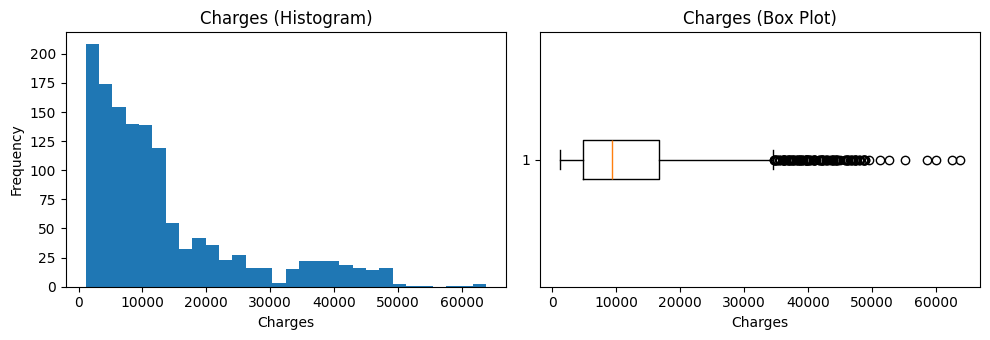

In [14]:
# 4 Visualizations

#Insurance Charges
fig, axes = plt.subplots(1, 2, figsize=(10, 3.5))

# Histogram
selected_insurance["charges"].plot(kind="hist", bins=30, ax=axes[0], title="Charges (Histogram)")
axes[0].set_xlabel("Charges")
axes[0].set_ylabel("Frequency")

# Box plot
axes[1].boxplot(selected_insurance["charges"], vert=False)
axes[1].set_title("Charges (Box Plot)")
axes[1].set_xlabel("Charges")

plt.tight_layout()
plt.show()


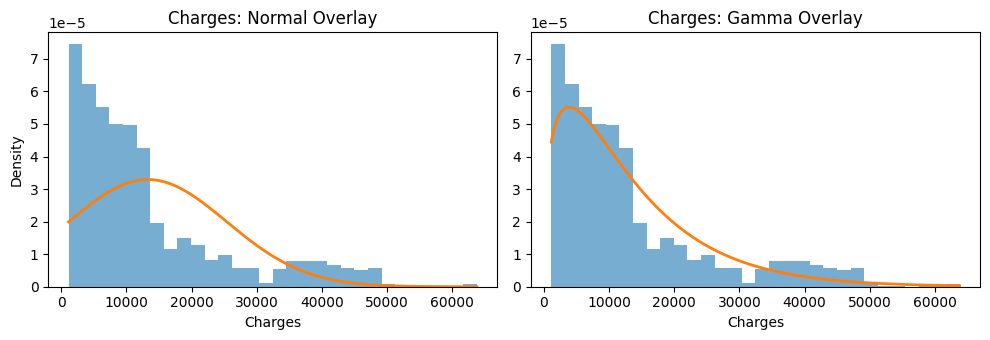

In [15]:
import numpy as np
from scipy.stats import norm, gamma

x = np.linspace(selected_insurance["charges"].min(), selected_insurance["charges"].max(), 500)

# Normal 
mu = selected_insurance["charges"].mean()
sigma = selected_insurance["charges"].std()
normal_pdf = norm.pdf(x, mu, sigma)

# Gamma
shape, loc, scale = gamma.fit(selected_insurance["charges"], floc=0)
gamma_pdf = gamma.pdf(x, shape, loc, scale)

fig, axes = plt.subplots(1, 2, figsize=(10, 3.5))

axes[0].hist(selected_insurance["charges"], bins=30, density=True, alpha=0.6)
axes[0].plot(x, normal_pdf, linewidth=2)
axes[0].set_title("Charges: Normal Overlay")
axes[0].set_xlabel("Charges")
axes[0].set_ylabel("Density")

axes[1].hist(selected_insurance["charges"], bins=30, density=True, alpha=0.6)
axes[1].plot(x, gamma_pdf, linewidth=2)
axes[1].set_title("Charges: Gamma Overlay")
axes[1].set_xlabel("Charges")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

Why Gamma?

Based on the side-by-side comparison, the Gamma distribution provides a better fit for insurance charges than the Normal distribution. The histogram of charges shows a strong right skew, with most observations concentrated at lower values and a long tail of higher costs. The Normal distribution, which assumes symmetry around the mean, does not capture this shape well and underestimates the frequency of higher charge values.

In contrast, the Gamma distribution aligns more closely with the observed data because it is defined only for positive values and allows for right skew and a long tail. This matches the characteristics of insurance charges, which represent accumulated healthcare costs and cannot be negative. As discussed in class, probability distributions are used here as reference tools rather than exact models, and visually, the Gamma distribution better reflects the shape, spread, and tail behavior of the charges data.

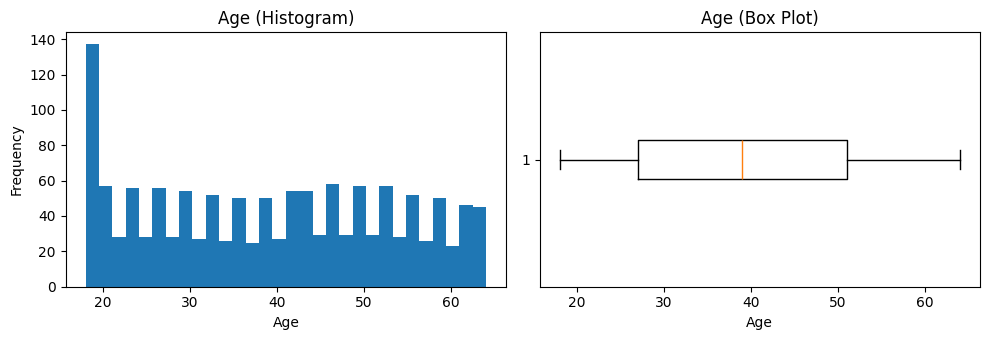

In [16]:
#Age
fig, axes = plt.subplots(1, 2, figsize=(10, 3.5))

selected_insurance["age"].plot(kind="hist", bins=30, ax=axes[0], title="Age (Histogram)")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")

axes[1].boxplot(selected_insurance["age"], vert=False)
axes[1].set_title("Age (Box Plot)")
axes[1].set_xlabel("Age")

plt.tight_layout()
plt.show()

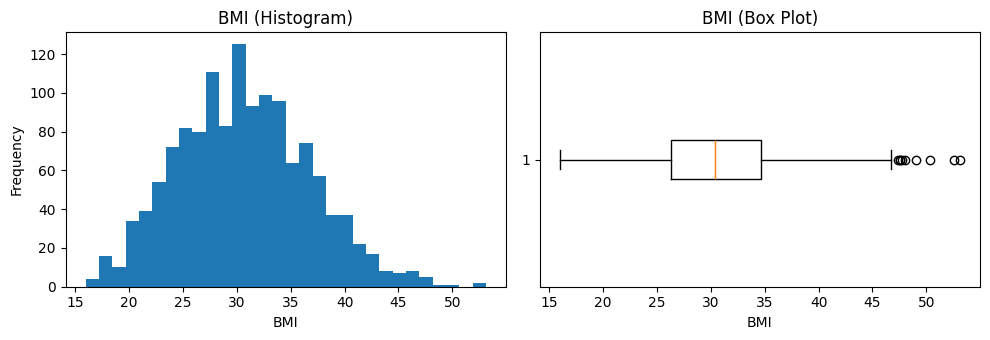

In [17]:
#BMI
fig, axes = plt.subplots(1, 2, figsize=(10, 3.5))

selected_insurance["bmi"].plot(kind="hist", bins=30, ax=axes[0], title="BMI (Histogram)")
axes[0].set_xlabel("BMI")
axes[0].set_ylabel("Frequency")

axes[1].boxplot(selected_insurance["bmi"], vert=False)
axes[1].set_title("BMI (Box Plot)")
axes[1].set_xlabel("BMI")

plt.tight_layout()
plt.show()

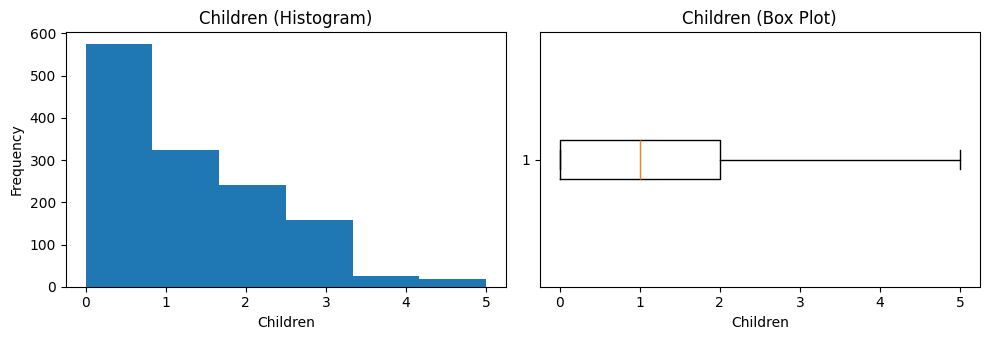

In [18]:
#Children
fig, axes = plt.subplots(1, 2, figsize=(10, 3.5))

selected_insurance["children"].plot(kind="hist", bins=6, ax=axes[0], title="Children (Histogram)")
axes[0].set_xlabel("Children")
axes[0].set_ylabel("Frequency")

axes[1].boxplot(selected_insurance["children"], vert=False)
axes[1].set_title("Children (Box Plot)")
axes[1].set_xlabel("Children")

plt.tight_layout()
plt.show()

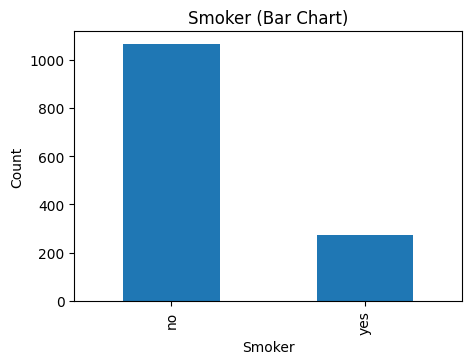

In [19]:
#Smoker
fig, ax = plt.subplots(figsize=(5, 3.5))

selected_insurance["smoker"].value_counts().plot(kind="bar", ax=ax, title="Smoker (Bar Chart)")
ax.set_xlabel("Smoker")
ax.set_ylabel("Count")

plt.show()

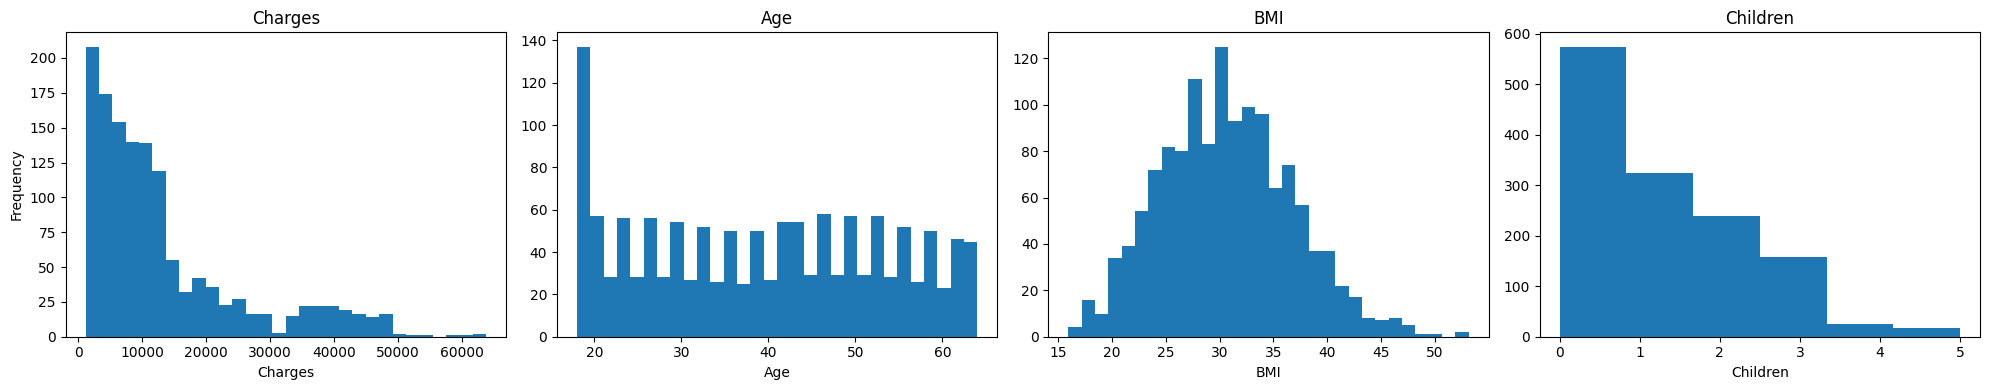

In [20]:
#All Histograms Together
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

selected_insurance["charges"].plot(
    kind="hist", bins=30, ax=axes[0], title="Charges"
)
axes[0].set_xlabel("Charges")
axes[0].set_ylabel("Frequency")

selected_insurance["age"].plot(
    kind="hist", bins=30, ax=axes[1], title="Age"
)
axes[1].set_xlabel("Age")
axes[1].set_ylabel("")

selected_insurance["bmi"].plot(
    kind="hist", bins=30, ax=axes[2], title="BMI"
)
axes[2].set_xlabel("BMI")
axes[2].set_ylabel("")

selected_insurance["children"].plot(
    kind="hist", bins=6, ax=axes[3], title="Children"
)
axes[3].set_xlabel("Children")
axes[3].set_ylabel("")

plt.tight_layout()
plt.show()

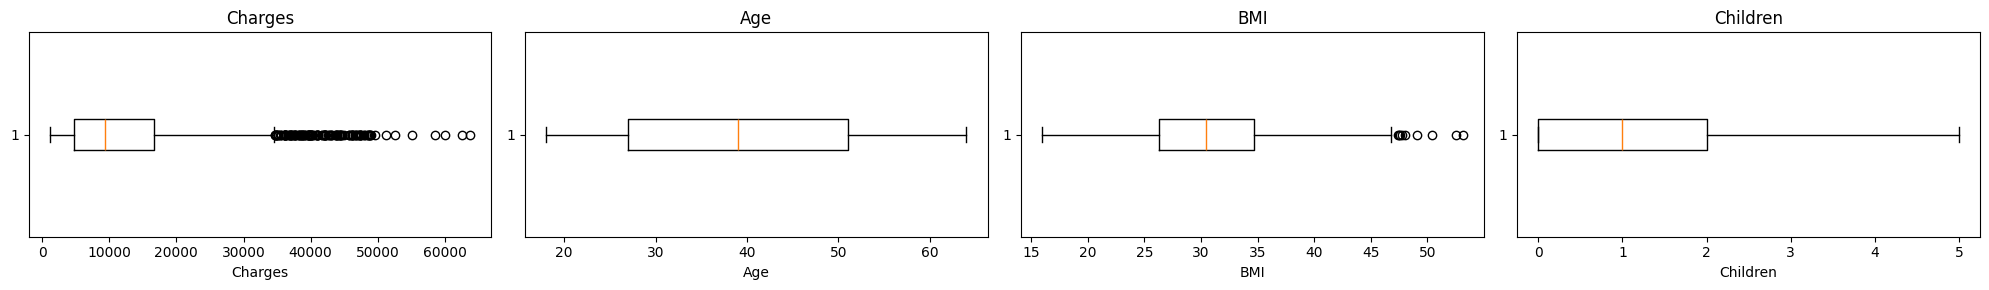

In [21]:
#All Box plots together

fig, axes = plt.subplots(1, 4, figsize=(20, 3))

axes[0].boxplot(selected_insurance["charges"], vert=False)
axes[0].set_title("Charges")
axes[0].set_xlabel("Charges")

axes[1].boxplot(selected_insurance["age"], vert=False)
axes[1].set_title("Age")
axes[1].set_xlabel("Age")

axes[2].boxplot(selected_insurance["bmi"], vert=False)
axes[2].set_title("BMI")
axes[2].set_xlabel("BMI")

axes[3].boxplot(selected_insurance["children"], vert=False)
axes[3].set_title("Children")
axes[3].set_xlabel("Children")

plt.tight_layout()
plt.show()

To compare distribution shapes and variability across numeric variables, I plotted all histograms and box plots together using a shared layout, as demonstrated in class.

#5 Discussion of Visualizations

Across the histograms and box plots, insurance charges stand out as the most unevenly distributed variable. The histogram shows a strong right skew, with most observations concentrated at lower charge values and a long tail of higher costs. This pattern is reinforced by the box plot, which displays several high-end values beyond the upper whisker. Together, these visuals explain why the mean is higher than the median and highlight how a small number of extreme cases contribute substantially to overall variability.

The remaining numeric variables show more moderate patterns. 
* Age appears relatively evenly distributed across adulthood, with the box plot showing no extreme outliers.
* BMI shows mild right skew, with a concentration around higher values and a few higher-end observations that may be relevant for health risk.
* Children is clearly clustered at lower counts, especially 0 and 1, indicating limited variation. T
* The bar chart for smoking status shows a clear imbalance, with non-smokers making up the majority of the dataset, which is important context for later comparisons.

![Questions](https://s7d9.scene7.com/is/image/roberthalfintl/Shutterstock_1969502767%20%281%29:Medium-1x?fmt=webp-alpha)

#6 Summary and domain implications

Overall, the univariate analysis suggests that insurance charges vary widely across individuals and are not evenly distributed. The strong right skew and presence of high-cost outliers indicate that a small subset of individuals accounts for disproportionately large medical expenses. This has important implications for how insurance costs are summarized and analyzed, as relying on the mean alone may not accurately represent typical spending.

The distributions of age, BMI, and smoking status provide additional context for understanding potential drivers of insurance charges. Age spans a broad adult population, while BMI values cluster in ranges commonly associated with increased health risk. Smoking status, although less common, represents a group that may contribute disproportionately to higher charges. In contrast, the number of children shows limited variation, suggesting it may play a smaller role in explaining large differences in costs on its own.

These findings raise several questions for further analysis. For example, how do insurance charges differ between smokers and non-smokers? Does insurance cost increase steadily with age or BMI, or only beyond certain thresholds? Additionally, are the highest insurance charges concentrated among specific combinations of risk factors? These questions will be explored more effectively through bivariate and multivariate analysis.

## Bivariate Analysis

1. Select at least two pairs of variables to analyze relationships (e.g., in the diamond dataset, price versus carat or cut versus price). Each pair will generally be the target variable of the dataset and another factor (but it need not be).
2. Try to pick different *kinds* of variables (numerical versus numerical, categorical versus numerical, categorical versus categorical).
3. Use a research question and/or hypothesis to pick the pairs of variables.
4. In the Markdown cell below, state a hypothesis about the relationship. This must be done *before* analyzing the data.

**Notes:**
   * Your dataset may have limited options for exploring the different kinds of variable pairings---that's okay.
   * In the real world, in a real analysis, you would want to look at **all** of the important pairings, especially each variable against the target variable and then some variables against each other.

Hypothesis 1:
I hypothesize that insurance charges increase with age. As individuals get older, they may require more frequent medical care or treatment for chronic conditions, which could result in higher healthcare costs.

![Sick](https://discoveryvillages.com/wp-content/uploads/2021/12/sick-senior-woman-covered-in-blanket-coughing-hard-at-home.jpg)

Hypothesis 2:
I hypothesize that smoking status differs across BMI categories. Differences in health behaviors across BMI groups may help explain patterns observed in insurance charges and provide additional context for understanding health risk factors.

![Smoker](https://bhsst.org/wp-content/uploads/2020/10/bb22e5d8e1084fc0afe72170dae345121.jpg)

In the Markdown cell below, answer the following in a bulleted list. Answer the questions for each pair of variables you chose.

5. What pairs of variables did you select?
   * What kind of pairing is this? (numerical v. numerical, categorical v. numerical, or categorical v. categorical)?
   * What research question or hypothesis led you to pick that pair?

Charges and Age 
* Type of pairing: Numerical vs. Numerical
* Research question / hypothesis: I chose this pair to examine whether insurance charges tend to increase with age. Since healthcare needs often change as people get older, I hypothesize that higher age may be associated with higher insurance charges.


Smoking Status and BMI Category 
* Type of pairing: Categorical vs. categorical
* Research question / hypothesis: I chose this pair to explore whether smoking behavior differs across BMI categories. I hypothesize that the proportion of smokers may vary by BMI group, which could help explain patterns observed in insurance charges and health risk factors.

For each pair of variables:

6. Compute descriptive statistics/cross tab for each pair of variables. 
7. Create visualizations to illustrate relationships, such as:
   * Scatter plots for numerical variables.
   * Box charts for categorical versus numerical variables. 
8. Use Markdown to describe and interpret the relationships you observe and their relevance to decision-making. 

In [22]:
# Descriptive statistics for charges and age
selected_insurance[["charges", "age"]].describe()

,charges,age
count,1338.000000,1338.000000
mean,13270.422265,39.207025
std,12110.011237,14.049960
min,1121.873900,18.000000
25%,4740.287150,27.000000
50%,9382.033000,39.000000
75%,16639.912515,51.000000
max,63770.428010,64.000000


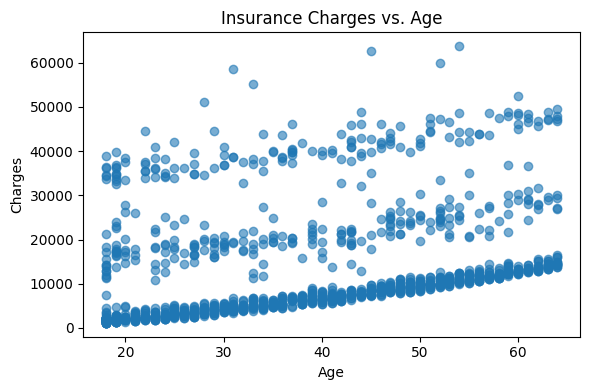

In [23]:
#Scatterplot for Charges vs. Age

fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(
    selected_insurance["age"],
    selected_insurance["charges"],
    alpha=0.6
)

ax.set_title("Insurance Charges vs. Age")
ax.set_xlabel("Age")
ax.set_ylabel("Charges")

plt.tight_layout()
plt.show()

The scatter plot of insurance charges versus age shows a general upward pattern, with higher charges becoming more common as age increases. However, the relationship is not strictly linear, and there is substantial variability at nearly every age. In particular, the spread of charges widens for older individuals, indicating that age alone does not explain differences in insurance costs. A scatter plot is appropriate here because both variables are numeric, and this visualization allows the full distribution, variability, and potential clusters to be observed, as emphasized in class.

A bar chart would not be an appropriate visualization for this pairing, since both variables are continuous. Using bars would require aggregation and would obscure important patterns such as variability and outliers. As discussed in class, scatter plots should be used first to visually assess the relationship before considering summary measures like correlation. While there appears to be a positive association between age and charges, the variability suggests that a single correlation value would oversimplify the relationship. This highlights why correlation should be interpreted cautiously and always in combination with visual inspection.

From a decision-making perspective, this suggests that age may contribute to higher insurance charges, but only as part of a broader set of factors. Insurers should be cautious about relying on age alone when assessing cost risk.

In [24]:
# Spearman correlation between age and charges
selected_insurance[["age", "charges"]].corr(method="spearman")


,age,charges
age,1.000000,0.534392
charges,0.534392,1.000000


A Spearman correlation of 0.53 indicates a moderate positive association between age and insurance charges, supporting the visual pattern observed in the scatter plot while highlighting that age alone does not determine costs.

In [25]:
#Creating BMI Categories

selected_insurance["bmi_category"] = pd.cut(
    selected_insurance["bmi"],
    bins=[0, 18.5, 25, 30, 100],
    labels=["Underweight", "Normal", "Overweight", "Obese"]
)

In [26]:
bmi_smoker_crosstab = pd.crosstab(
    selected_insurance["bmi_category"],
    selected_insurance["smoker"]
)

bmi_smoker_crosstab


smoker,no,yes
bmi_category,,
Underweight,16,5
Normal,176,50
Overweight,311,75
Obese,561,144


To make BMI easier to analyze, I am converting the numeric bmivariable into an ordered categorical variable called bmi_category (Underweight, Normal, Overweight, Obese). This will make it easier to compare smoking status across standard BMI groups using a crosstab and bar chart, rather than interpreting BMI as many individual numeric values. 

A crosstab was used to summarize the relationship between smoking status and BMI category by showing how observations are distributed across combinations of the two categorical variables.

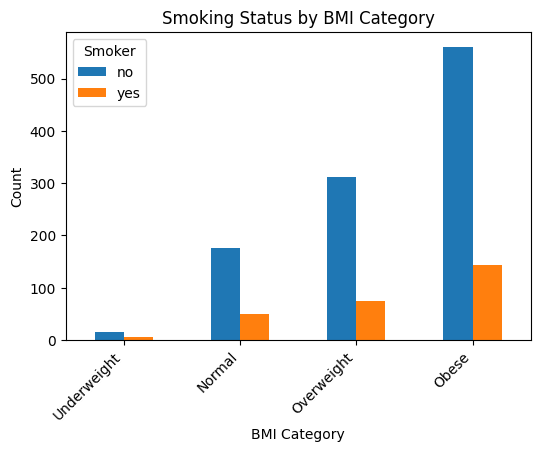

In [27]:
#Bar Chart for Smoking Status by BMI Category

fig, ax = plt.subplots(figsize=(6, 4))

bmi_smoker_crosstab.plot(kind="bar", ax=ax)

ax.set_title("Smoking Status by BMI Category")
ax.set_xlabel("BMI Category")
ax.set_ylabel("Count")
ax.legend(title="Smoker")
plt.xticks(rotation=45, ha="right")

plt.show()


The bar chart comparing smoking status across BMI categories shows that non-smokers make up the majority of individuals in every BMI group, while the number of smokers increases as BMI category moves from underweight to obese. A bar chart is appropriate here because both variables are categorical, and counts allow for direct comparison between groups. This aligns with the class guidance that categorical variables should be summarized using frequencies or proportions rather than continuous plots.

A scatter plot would not be appropriate for this pairing, since neither variable represents a continuous numeric scale. The observed pattern suggests that smoking and higher BMI often co-occur in this dataset, which may help explain differences in insurance charges observed earlier. From a domain standpoint, this supports the idea that health risk factors may cluster, rather than act independently, when evaluating insurance-related outcomes.

Correlation measures are not appropriate for this pairing because both smoking status and BMI category are categorical variables. As discussed in class, categorical–categorical relationships are better examined using contingency tables and bar charts rather than correlation coefficients.

## Multivariate Analysis

1. Create a multivariate visualization that explores relationships among three or more variables (e.g., scatter plot with color coding by a third variable, heatmaps, or parallel coordinate plots). 
2. In a Markdown cell, interpret the visualization and explain its potential applications in the dataset’s domain. 

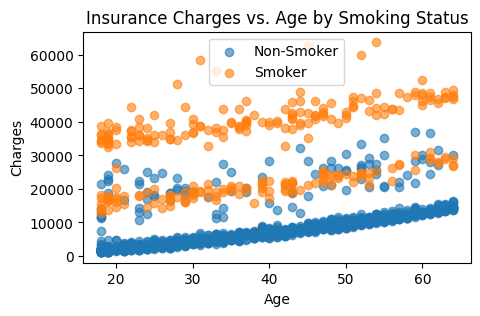

In [28]:
#Multivariate Scatter Plot

fig, ax = plt.subplots(figsize=(5, 3))

#Separating smokers and non-smokers
non_smokers = selected_insurance[selected_insurance["smoker"] == "no"]
smokers = selected_insurance[selected_insurance["smoker"] == "yes"]

ax.scatter(
    non_smokers["age"],
    non_smokers["charges"],
    alpha=0.6,
    label="Non-Smoker"
)

ax.scatter(
    smokers["age"],
    smokers["charges"],
    alpha=0.6,
    label="Smoker"
)

ax.set_title("Insurance Charges vs. Age by Smoking Status")
ax.set_xlabel("Age")
ax.set_ylabel("Charges")
ax.legend()

plt.show()


The multivariate scatter plot showing insurance charges versus age, colored by smoking status, reveals a clear separation between smokers and non-smokers. Across nearly all ages, smokers consistently have higher insurance charges, and the highest cost observations are largely concentrated among older smokers. This visualization builds on the earlier bivariate analysis by showing how smoking status modifies the relationship between age and charges, rather than simply adding an independent effect.

This plot also reinforces why correlation alone is insufficient for understanding insurance costs. Even if age and charges are positively correlated overall, the presence of distinct subgroups (smokers versus non-smokers) shows that the relationship differs across populations. As discussed in class, visualizing multiple variables together helps prevent misleading conclusions that can arise from relying solely on correlation coefficients. For insurance decision-making, this multivariate perspective is especially valuable because it highlights high risk subgroups that may drive a disproportionate share of healthcare costs.

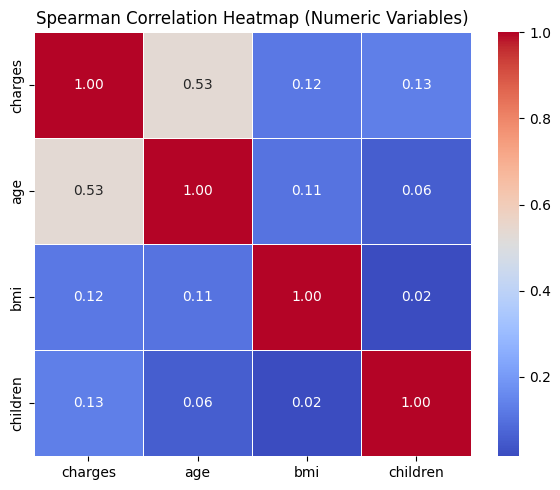

In [29]:
#Multivariate heatmap 

# Select numeric variables
numeric_vars = ["charges", "age", "bmi", "children"]

# Compute Spearman correlation
corr_matrix = selected_insurance[numeric_vars].corr(method="spearman")

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Spearman Correlation Heatmap (Numeric Variables)")
plt.tight_layout()
plt.show()


The heatmap shows the Spearman correlations between the numeric variables. Insurance charges have a moderate positive relationship with age (ρ ≈ 0.53), meaning charges generally increase as age increases. This matches what was seen in the earlier scatter plot.

The relationships between charges and BMI (ρ ≈ 0.12) and charges and number of children (ρ ≈ 0.13) are much weaker. This suggests that while these factors may play a role, they do not strongly explain insurance costs on their own. The low correlations among age, BMI, and children also indicate that these variables are largely independent of one another.

The heatmap provides a quick summary of multiple relationships at once. As discussed in class, heatmaps are useful for comparing the relative strength of associations, but they should be interpreted alongside other visualizations. In this case, the heatmap supports the earlier bivariate findings rather than replacing them.


![Takeaways](https://images.unsplash.com/photo-1586769852836-bc069f19e1b6?q=80&w=1170&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D)


### Overall Findings and Key Takeaways

This exploratory analysis shows that insurance charges are most strongly associated with age and smoking status. Age has a moderate positive relationship with charges, while smoking is linked to higher costs and greater variability, indicating it is an important risk factor. These patterns were consistent across univariate, bivariate, and multivariate analyses.

Other variables, such as BMI and number of children, showed weaker individual relationships with charges. While BMI may still contribute in combination with other health factors, it does not appear to strongly explain costs on its own. The number of children showed minimal association with charges, suggesting that household size is less relevant than health-related variables in this dataset.

The region variable was not explored in depth in this analysis. Although region may capture geographic differences in healthcare costs, it was not prioritized due to limited contextual information and because individual level health and behavioral factors showed stronger associations with charges. In future analyses, region could be examined through grouped comparisons or included in a multivariate model to assess whether geographic patterns emerge after accounting for individual risk factors.

Overall, this analysis highlights the value of combining visual exploration with simple statistical summaries. Using multiple visualization types and correlation measures helped confirm key patterns while avoiding overinterpretation. These findings suggest that future analyses or predictive models should prioritize age and behavioral risk factors, such as smoking, when explaining variation in insurance costs.


## References
As appropriate, cite any sources you used to support the completion of your assignment in the Markdown cell below. If you used an AI assistant, provide a PDF copy of the conversation log as part of your submission in Canvas. Make sure your name and the date of the conversation are included.

REFERENCES:

Centers for Disease Control and Prevention. (2024). Current cigarette smoking among adults in the United States. https://www.cdc.gov/tobacco/php/data-statistics/adult-data-cigarettes/index.html

Centers for Disease Control and Prevention. (2025). Adult obesity and overweight. https://www.cdc.gov/nchs/fastats/obesity-overweight.htm

Kluckow, R. (2025). *Session 4: Live coding example*. AAN 505: Statistics for Applied Analytics, University of Southern California.

Kluckow, R. (2025). *Week 5 lecture slides*. AAN 505: Statistics for Applied Analytics, University of Southern California.

Matplotlib Developers. (2024). *Pyplot tutorial*. https://matplotlib.org/stable/tutorials/pyplot.html

Mayo Clinic. (2025). Smoking and tobacco use: Health effects. https://www.mayoclinic.org/diseases-conditions/nicotine-dependence/symptoms-causes/syc-20351584

Stripling, G. (2022, April 11). Exploratory data analysis. In *Deep learning and generative AI: Data prep, analysis, and visualization with Python*. LinkedIn Learning. https://www.linkedin.com/learning/deep-learning-and-generative-ai-data-prep-analysis-and-visualization-with-python/exploratory-data-analysis-eda

Turp, M. (2021, May 24). How to do data exploration (step-by-step tutorial on real-life dataset). YouTube. https://youtu.be/OY4eQrekQvs

Wikipedia contributors. (2026). Body mass index. *Wikipedia*. https://en.wikipedia.org/wiki/Body_mass_index


## Save and Download

Save your Jupyter Notebook as two files for submission: .ipynb and .html
<ul>
  <li>Use this file naming convention to save your .ipynb file: lastnamefirstnameinitial_aan505_w5a.ipynb</li>
    <ul>
<li>Example: garciaj_aan505_w5a.ipynb</li>
    </ul>
  <li>Download the .ipynb file to your computer</li>
  <li>Save and export your notebook as HTML (.html) using the same file naming convention</li>
</ul>